## Import Libraries and Packages

In [10]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Conv1D, Dropout, Dense, Flatten
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [11]:
data_miRNA = pd.read_csv("C:\IDCNN\BRCA_miRNA.csv",index_col=0)
print("BRCA miRNA :", data_miRNA.shape)
data_miRNA = np.transpose(data_miRNA)
print("Transposed BRCA miRNA :", data_miRNA.shape)
data_miRNA = data_miRNA.drop_duplicates()
print ("Dropped BRCA miRNA : ", data_miRNA.shape)

data_miRNA.index.name = 'PatientID'
print(data_miRNA.head())

BRCA miRNA : (368, 671)
Transposed BRCA miRNA : (671, 368)
Dropped BRCA miRNA :  (671, 368)
                 hsa.let.7a.1  hsa.let.7a.2  hsa.let.7a.3  hsa.let.7b  \
PatientID                                                               
TCGA.3C.AAAU.01      0.068317      0.068932      0.073899    0.524562   
TCGA.3C.AALI.01     -0.301684     -0.318009     -0.301310    0.419859   
TCGA.3C.AALJ.01     -0.150810     -0.122747     -0.126333   -0.958939   
TCGA.3C.AALK.01      0.107831      0.097594      0.095545    0.615389   
TCGA.5L.AAT0.01      0.395211      0.412879      0.418441    0.500594   

                 hsa.let.7c  hsa.let.7d  hsa.let.7e  hsa.let.7f.1  \
PatientID                                                           
TCGA.3C.AAAU.01   -1.656853   -0.038283    0.501125     -2.390084   
TCGA.3C.AALI.01   -0.715963    0.460975   -1.999304     -0.659788   
TCGA.3C.AALJ.01   -0.971038    0.866585    2.074809      1.080746   
TCGA.3C.AALK.01    0.711952   -0.454282    0.227441

In [12]:
data_DNA_methylation = pd.read_csv("C:\IDCNN\BRCA_DNAMethylation.csv",index_col=0)
print("BRCA DNA Methylation :", data_DNA_methylation.shape)
data_DNA_methylation = np.transpose(data_DNA_methylation)
print("Transposed BRCA DNA Methylation :", data_DNA_methylation.shape)
data_DNA_methylation = data_DNA_methylation.drop_duplicates()
print ("Dropped BRCA DNA Methylation : ", data_DNA_methylation.shape)

data_DNA_methylation.index.name = 'PatientID'
print(data_DNA_methylation.head())

BRCA DNA Methylation : (19049, 671)
Transposed BRCA DNA Methylation : (671, 19049)
Dropped BRCA DNA Methylation :  (671, 19049)
                     A1BG      A1CF       A2M     A2ML1   A3GALT2    A4GALT  \
PatientID                                                                     
TCGA.3C.AAAU.01 -1.211396 -1.801239 -0.696763  0.832338  0.857098 -0.695053   
TCGA.3C.AALI.01  0.974531 -1.091976 -1.597015  0.758754  0.450506  1.570301   
TCGA.3C.AALJ.01  0.633283 -0.258825 -0.873714  0.753608  0.821330 -0.369450   
TCGA.3C.AALK.01  0.354642  0.344929 -1.080573  0.548382  0.497375  1.342464   
TCGA.5L.AAT0.01 -1.939963 -0.018208 -0.788607  0.589277  0.400632  1.553188   

                    A4GNT      AAAS      AACS     AADAC  ...     ZWINT  \
PatientID                                                ...             
TCGA.3C.AAAU.01 -0.258891  0.601832 -0.100803 -5.232067  ...  0.835761   
TCGA.3C.AALI.01  0.330579 -0.912745 -0.682832 -1.232277  ...  0.664052   
TCGA.3C.AALJ.01 -0.315

In [13]:
data_CNV = pd.read_csv("C:\IDCNN\BRCA_CopyNumberVariation.csv",index_col=0)
print("BRCA CNV :", data_CNV.shape)
data_CNV = np.transpose(data_CNV)
print("Transposed BRCA CNV :", data_CNV.shape)
data_CNV = data_CNV.drop_duplicates()
print ("Dropped BRCA CNV : ", data_CNV.shape)

data_CNV.index.name = 'PatientID'
print(data_CNV.head())

BRCA CNV : (19568, 671)
Transposed BRCA CNV : (671, 19568)
Dropped BRCA CNV :  (671, 19568)
                     A1BG      A1CF       A2M     A2ML1   A3GALT2    A4GALT  \
PatientID                                                                     
TCGA.3C.AAAU.01  0.495252 -0.938762  0.750838  0.748593  1.093743 -0.876388   
TCGA.3C.AALI.01  1.028904 -1.575977  0.010864  0.005894 -1.575680 -0.967673   
TCGA.3C.AALJ.01  0.003059  0.405308  0.103201  0.098571 -0.706498 -1.643561   
TCGA.3C.AALK.01 -0.258705  0.096910 -0.169130 -0.174763  0.199712  0.570857   
TCGA.5L.AAT0.01 -0.083232  0.060782 -2.090765 -2.103474  0.376570  0.631333   

                    A4GNT      AAAS      AACS     AADAC  ...     ZWINT  \
PatientID                                                ...             
TCGA.3C.AAAU.01  1.109460 -1.966983 -1.676420  1.090124  ... -0.837399   
TCGA.3C.AALI.01  1.481901 -0.040373 -0.027748  1.213108  ... -1.537275   
TCGA.3C.AALJ.01 -0.661117 -1.342185  1.469986 -0.571499  .

In [14]:
data_label = pd.read_csv("C:\IDCNN\BRCA_label.csv")
print("BRCA Label :", data_label.shape)

print(data_label.info())
print(data_label.head())

# Replace label with numerical data
data_label['Label'].replace('Normal', 0 , inplace=True)
data_label['Label'].replace('LumA', 1 , inplace=True)
data_label['Label'].replace('LumB', 2 , inplace=True)
data_label['Label'].replace('Basal', 3 , inplace=True)
data_label['Label'].replace('Her2', 4 , inplace=True)

print(data_label.head())

BRCA Label : (671, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   671 non-null    object
dtypes: object(1)
memory usage: 5.4+ KB
None
  Label
0  LumA
1  Her2
2  LumB
3  LumA
4  LumA
   Label
0      1
1      4
2      2
3      1
4      1


## MULTIOMICS

In [15]:
# Concatenate along columns axis (axis=1)
multiomics = pd.concat([data_miRNA, data_DNA_methylation, data_CNV], axis=1)

# Print the shape to verify
print("Combined BRCA Data Shape:", multiomics.shape)
print(multiomics.head())

# Add the 'Label' column from data_label to multiomics
multiomics['Label'] = data_label['Label'].to_numpy()

# Print the updated multiomics DataFrame
print("Multiomics:", multiomics.shape)
print(multiomics.head())

# Print the shape to verify
print("Multiomics:", multiomics.shape)
print(multiomics.head())

Combined BRCA Data Shape: (671, 38985)
                 hsa.let.7a.1  hsa.let.7a.2  hsa.let.7a.3  hsa.let.7b  \
PatientID                                                               
TCGA.3C.AAAU.01      0.068317      0.068932      0.073899    0.524562   
TCGA.3C.AALI.01     -0.301684     -0.318009     -0.301310    0.419859   
TCGA.3C.AALJ.01     -0.150810     -0.122747     -0.126333   -0.958939   
TCGA.3C.AALK.01      0.107831      0.097594      0.095545    0.615389   
TCGA.5L.AAT0.01      0.395211      0.412879      0.418441    0.500594   

                 hsa.let.7c  hsa.let.7d  hsa.let.7e  hsa.let.7f.1  \
PatientID                                                           
TCGA.3C.AAAU.01   -1.656853   -0.038283    0.501125     -2.390084   
TCGA.3C.AALI.01   -0.715963    0.460975   -1.999304     -0.659788   
TCGA.3C.AALJ.01   -0.971038    0.866585    2.074809      1.080746   
TCGA.3C.AALK.01    0.711952   -0.454282    0.227441     -0.735552   
TCGA.5L.AAT0.01    0.426323   -1.54

## Treat Imbalance Data without using SMOTE

In [16]:
# Split the data into training and testing sets with a test size of 30%
train_data, test_data = train_test_split(multiomics,test_size=0.30,random_state=1)
target="Label"
print(train_data.columns)
print(test_data.columns)
X_train = train_data.select_dtypes(include=["number"]).copy()
y_train = train_data[target]
X_test = test_data.select_dtypes(include=["number"]).copy()
y_test = test_data[target]

Index(['hsa.let.7a.1', 'hsa.let.7a.2', 'hsa.let.7a.3', 'hsa.let.7b',
       'hsa.let.7c', 'hsa.let.7d', 'hsa.let.7e', 'hsa.let.7f.1',
       'hsa.let.7f.2', 'hsa.let.7g',
       ...
       'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3',
       'pk', 'Label'],
      dtype='object', length=38986)
Index(['hsa.let.7a.1', 'hsa.let.7a.2', 'hsa.let.7a.3', 'hsa.let.7b',
       'hsa.let.7c', 'hsa.let.7d', 'hsa.let.7e', 'hsa.let.7f.1',
       'hsa.let.7f.2', 'hsa.let.7g',
       ...
       'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3',
       'pk', 'Label'],
      dtype='object', length=38986)


In [17]:
# Print the shapes of the training and testing sets
print("X train :", X_train.shape)
print("X test :", X_test.shape)
print("Y train :", y_train.shape)
print("Y test :", y_test.shape)

X train : (469, 38986)
X test : (202, 38986)
Y train : (469,)
Y test : (202,)


In [18]:
# Assuming y_train is already defined
y_train = pd.DataFrame(y_train, columns=['Label'])
# Print the counts of each class in the original training data
print(y_train["Label"].value_counts()[0])
print(y_train["Label"].value_counts()[1])
print(y_train["Label"].value_counts()[2])
print(y_train["Label"].value_counts()[3])
print(y_train["Label"].value_counts()[4])

print(y_train.shape)

21
245
96
82
25
(469, 1)


 ## Feature Selection using SVM-RFE

In [19]:
# Define the SVM model
model = SVC(kernel="linear")

# Define RFE with the SVM model, choosing a number of features to select
rfe = RFE(estimator=model, n_features_to_select=18000, step=0.1)

# Fit RFE on the training data
rfe.fit(X_train, y_train.values.ravel())

RFE(estimator=SVC(kernel='linear'), n_features_to_select=18000, step=0.1)

In [21]:
# Ensure all column names are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Transform the training and test sets to include only the selected features
x_train_rfe_multiomics = rfe.transform(X_train)
x_test_rfe_multiomics = rfe.transform(X_test)

print("X_train after RFE:", x_train_rfe_multiomics.shape)
print("X_test after RFE:", x_test_rfe_multiomics.shape)

# Convert the transformed arrays back to DataFrames and obtain the selected feature names
selected_features_multiomics = X_train.columns[rfe.support_]

X_train_rfe_multiomics = pd.DataFrame(x_train_rfe_multiomics, columns=selected_features_multiomics, index=X_train.index)
X_test_rfe_multiomics = pd.DataFrame(x_test_rfe_multiomics, columns=selected_features_multiomics, index=X_test.index)

print("X_train_rfe_multiomics after converting to DataFrame:", X_train_rfe_multiomics.shape)
print("X_test_rfe_multiomics after converting to DataFrame:", X_test_rfe_multiomics.shape)


X_train after RFE: (469, 18000)
X_test after RFE: (202, 18000)
X_train_rfe_multiomics after converting to DataFrame: (469, 18000)
X_test_rfe_multiomics after converting to DataFrame: (202, 18000)


## SDAE

In [23]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping

# Reshape data to 3D for SDAE (samples, timesteps, features)
X_resampled_multiomics_sdae = X_train_rfe_multiomics.values.reshape((X_train_rfe_multiomics.shape[0], X_train_rfe_multiomics.shape[1], 1))
X_test_rfe_multiomics_sdae = X_test_rfe_multiomics.values.reshape((X_test_rfe_multiomics.shape[0], X_test_rfe_multiomics.shape[1], 1))

# Define the architecture parameters
input_dim = X_resampled_multiomics_sdae.shape[1]
hidden1_dim = 64
hidden2_dim = 32
encoding_dim = 16

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Build the SDAE model
input_layer = Input(shape=(input_dim,))
hidden1 = Dense(hidden1_dim, activation='relu')(input_layer)
encoded1 = Dense(hidden2_dim, activation='relu')(hidden1)
encoded2 = Dense(encoding_dim, activation='relu')(encoded1)
decoded1 = Dense(hidden2_dim, activation='relu')(encoded2)
decoded2 = Dense(hidden1_dim, activation='relu')(decoded1)
output_layer = Dense(input_dim, activation='linear')(decoded2)

sdae = Model(inputs=input_layer, outputs=output_layer)

# Compile the SDAE model
sdae.compile(optimizer='adam', loss='mean_squared_error')

# Train the SDAE
sdae.fit(X_resampled_multiomics_sdae, X_resampled_multiomics_sdae, epochs=250, batch_size=32, shuffle=True, validation_data=(X_test_rfe_multiomics_sdae, X_test_rfe_multiomics_sdae), callbacks=[early_stopping])

# Use the SDAE to transform the data
X_train_transformed = sdae.predict(X_resampled_multiomics_sdae)
X_test_transformed = sdae.predict(X_test_rfe_multiomics_sdae)

Epoch 1/250
15/15 [==============================] - 18s 405ms/step - loss: 0.9990 - val_loss: 0.8471
Epoch 2/250
15/15 [==============================] - 1s 80ms/step - loss: 0.8617 - val_loss: 0.7918
Epoch 3/250
15/15 [==============================] - 1s 61ms/step - loss: 0.8232 - val_loss: 0.7745
Epoch 4/250
15/15 [==============================] - 1s 97ms/step - loss: 0.7870 - val_loss: 0.7593
Epoch 5/250
15/15 [==============================] - 1s 76ms/step - loss: 0.7645 - val_loss: 0.7495
Epoch 6/250
15/15 [==============================] - 1s 90ms/step - loss: 0.7471 - val_loss: 0.7454
Epoch 7/250
15/15 [==============================] - 1s 59ms/step - loss: 0.7349 - val_loss: 0.7442
Epoch 8/250
15/15 [==============================] - 1s 72ms/step - loss: 0.7236 - val_loss: 0.7426
Epoch 9/250
15/15 [==============================] - 1s 57ms/step - loss: 0.7105 - val_loss: 0.7405
Epoch 10/250
15/15 [==============================] - 1s 62ms/step - loss: 0.6959 - val_loss: 0.74

## Classifier Analysis

In [26]:
# Define a new classifier (e.g., SVM) to classify the transformed data
clf = SVC(kernel='linear')
clf.fit(X_train_transformed, y_train)

# Make predictions
y_pred_sdae = clf.predict(X_test_transformed)

# Evaluate the classifier
accuracy_sdae = accuracy_score(y_test, y_pred_sdae)
precision_sdae = precision_score(y_test, y_pred_sdae, average='weighted')
recall_sdae = recall_score(y_test, y_pred_sdae, average='weighted')
print(f"SDAE Model Accuracy: {accuracy_sdae}")
print(f"SDAE Model Precision: {precision_sdae}")
print(f"SDAE Model Recall: {recall_sdae}")

C:\Users\Nisha Mustafa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SDAE Model Accuracy: 0.6782178217821783
SDAE Model Precision: 0.6607855082938805
SDAE Model Recall: 0.6782178217821783



Confusion Matrix:
[[ 4  4  0  2  0]
 [ 4 88 14  0  2]
 [ 2 22 11  1  0]
 [ 0  0  0 27  4]
 [ 1  5  2  2  7]]

Classification Report:

Label: 0
precision: 0.3636
recall: 0.4000
f1-score: 0.3810
support: 10.0000

Label: 1
precision: 0.7395
recall: 0.8148
f1-score: 0.7753
support: 108.0000

Label: 2
precision: 0.4074
recall: 0.3056
f1-score: 0.3492
support: 36.0000

Label: 3
precision: 0.8438
recall: 0.8710
f1-score: 0.8571
support: 31.0000

Label: 4
precision: 0.5385
recall: 0.4118
f1-score: 0.4667
support: 17.0000
accuracy: 0.6782

Label: macro avg
precision: 0.5786
recall: 0.5606
f1-score: 0.5659
support: 202.0000

Label: weighted avg
precision: 0.6608
recall: 0.6782
f1-score: 0.6664
support: 202.0000


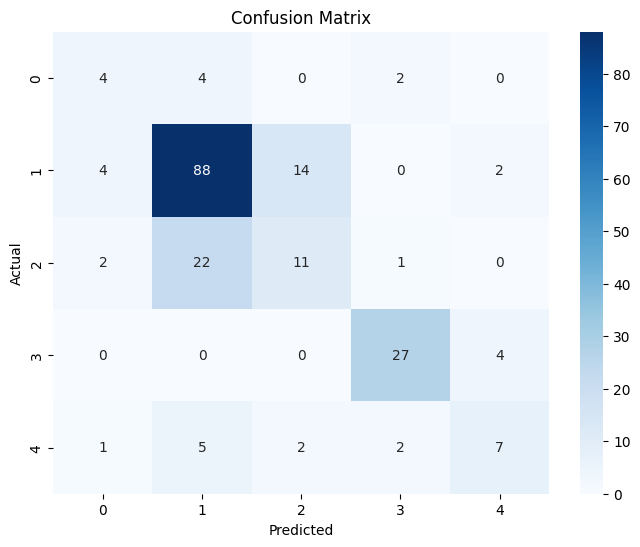

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_sdae)
print(cm)

# Classification Report with more precision
report = classification_report(y_test, y_pred_sdae, output_dict=True)

print("\nClassification Report:")
for label, metrics in report.items():
    if isinstance(metrics, dict):
        print(f"\nLabel: {label}")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")
    else:
        print(f"{label}: {metrics:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
